Hu
[[  2.35660755e-01]
 [  9.44846344e-03]
 [  1.01671826e-02]
 [  3.95414470e-04]
 [  2.29895443e-07]
 [ -1.02486904e-06]
 [  7.58765318e-07]]
flusser
[0.011521881986691133, -1.259690627511421e-06, -0.00012067939588943609, 5.060875516588194e-06]


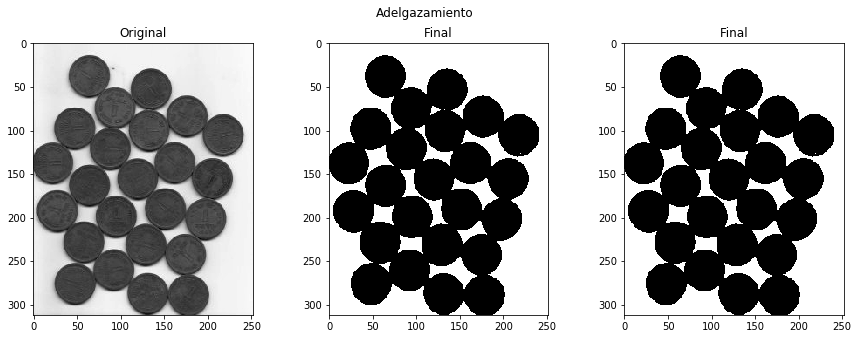

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def Flusser (M):
    F =[]
    F.append( ((M['mu20'] * M['mu02']) - (M['mu11'])**2)/M['m00']**4)

    F.append( ((M['mu30']**2 * M['mu03']**2) 
           - (6*M['mu30']*M['mu21']*M['mu12']*M['mu03'])
            + (4*M['mu30']*M['mu12']**3) 
            + (4*M['mu03']*M['mu21']**3) 
            - (3*M['mu21']**2 *M['mu12']**2)) 
    / (M['m00']**10)
            )

    F.append( (M['mu20']*(M['mu21'] * M['mu03'] - M['mu12']**2) 
           - M['mu11']*(M['mu30'] * M['mu03'] - M['mu12']*M['mu21'])
           + M['mu02']*(M['mu30'] * M['mu12'] - M['mu21']**2))
    / (M['m00']**7)
            )

    F.append( ((M['mu20']**3 * M['mu03']**2) 
           - (6*M['mu20']**2 *M['mu11']*M['mu12']*M['mu03'])
               - (6*M['mu20']**2 *M['mu02']*M['mu21']*M['mu03'])
               + (9*M['mu20']**2 *M['mu02']*M['mu12']**2)
               + (12*M['mu20'] *M['mu11']**2 *M['mu21']*M['mu03'])
               + (6*M['mu20'] *M['mu11']*M['mu02']*M['mu30']*M['mu03'])
               - (18*M['mu20'] *M['mu11']*M['mu02']*M['mu21']*M['mu12'])
               - (8*M['mu11']**3 *M['mu30']*M['mu03'])
               - (6*M['mu20'] *M['mu02']** 2 *M['mu30']*M['mu12'])
               + (9*M['mu20'] *M['mu02']**2 *M['mu21'])
               + (12*M['mu11']**2 *M['mu02']*M['mu30']*M['mu12'])
               - (6*M['mu11'] *M['mu02']**2 *M['mu30']*M['mu21'])
               + (M['mu02']**3 * M['mu30']**2)) 
    / (M['m00']**11)
        )
    return F

img = cv2.imread('Ej/w.jpg',0)
ret, thresh=cv2.threshold(img,127,255,0)
im2,contours, hierarchy=cv2.findContours(thresh,1,2)
cnt= contours[0]
M=cv2.moments(cnt)
F=Flusser(M)
Hu=cv2.HuMoments(M)
print 'Hu'
print Hu
print 'flusser'
print F
plt.figure(1,figsize=(15,5))
plt.suptitle("Adelgazamiento")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Final')
plt.subplot(133), plt.imshow(im2, cmap=plt.cm.gray), plt.title('Final')
plt.show()